```
# Author : Saima Sanjida Shila

# Course: CSC7700 - LSU
```



# Import Necessary Libraries :

---



*   Import mlp.py
*   numpy
*  etc.






In [ ]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
import struct
from array import array
from os.path import join
import random
from sklearn.model_selection import train_test_split
import numpy as np
from mlp import MultilayerPerceptron, Relu, Softmax, CrossEntropy, Dense
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


# MNIST Data Loader Class


---


In [ ]:
class MnistDataloader(object):
    def __init__(self, training_images_filepath, training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath

    def read_images_labels(self, images_filepath, labels_filepath):
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError(f'Magic number mismatch, expected 2049, got {magic}')
            labels = array("B", file.read())

        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError(f'Magic number mismatch, expected 2051, got {magic}')
            image_data = array("B", file.read())

        images = np.array(image_data, dtype=np.uint8).reshape(size, rows, cols)

        return images, np.array(labels)

    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train), (x_test, y_test)
#
# Set file paths based on added MNIST Datasets
#
training_images_filepath = 'train-images.idx3-ubyte'
training_labels_filepath = 'train-labels.idx1-ubyte'
test_images_filepath =  't10k-images.idx3-ubyte'
test_labels_filepath =  't10k-labels.idx1-ubyte'


# Load MNIST dataset

---




In [ ]:

mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

# Normalize pixel values (0-255 -> 0-1)
x_train = x_train.reshape(len(x_train), 784) / 255.0
x_test = x_test.reshape(len(x_test), 784) / 255.0

# Split training data into 80% train, 20% validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, shuffle=True)


# One-hot encode labels
num_classes = 10
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)


#  Define MLP Model 1


---



In [ ]:
#
# Build the MLP Model
#
mlp_model = MultilayerPerceptron([
    Dense(784, 1024, Relu()),  # More neurons
    Dense(1024, 512, Relu()),
    Dense(512, 256, Relu()),
    Dense(256, 128, Relu()),
    Dense(128, 10, Softmax())
])


#
# Train the Model
#

training_losses, validation_losses = mlp_model.train(
    x_train, y_train, x_val, y_val,
    learning_rate=0.001, batch_size=64, epochs=20
)




Epoch 1/20 - Training Loss: 2.2387 - Validation Loss: 2.2440
Epoch 2/20 - Training Loss: 2.1159 - Validation Loss: 2.1224
Epoch 3/20 - Training Loss: 1.9934 - Validation Loss: 2.0011
Epoch 4/20 - Training Loss: 1.8606 - Validation Loss: 1.8691
Epoch 5/20 - Training Loss: 1.7093 - Validation Loss: 1.7185
Epoch 6/20 - Training Loss: 1.5425 - Validation Loss: 1.5522
Epoch 7/20 - Training Loss: 1.3785 - Validation Loss: 1.3887
Epoch 8/20 - Training Loss: 1.2109 - Validation Loss: 1.2217
Epoch 9/20 - Training Loss: 1.0349 - Validation Loss: 1.0450
Epoch 10/20 - Training Loss: 0.9036 - Validation Loss: 0.9125
Epoch 11/20 - Training Loss: 0.8034 - Validation Loss: 0.8113
Epoch 12/20 - Training Loss: 0.7245 - Validation Loss: 0.7301
Epoch 13/20 - Training Loss: 0.7224 - Validation Loss: 0.7260
Epoch 14/20 - Training Loss: 1.3329 - Validation Loss: 1.3307
Epoch 15/20 - Training Loss: 0.6089 - Validation Loss: 0.6122
Epoch 16/20 - Training Loss: 0.6529 - Validation Loss: 0.6576
Epoch 17/20 - Tra

# Evaluate Model on Test Data

---



In [ ]:

#
# Evaluate Model on Test Data
#
print("\n Evaluating Model on Test Data...")
y_pred = mlp_model.predict(x_test)
y_true = np.argmax(y_test, axis=1)
accuracy = np.mean(y_pred == y_true) * 100

#
# Print Accuracy
#
print(f"\n Final Test Accuracy: {accuracy:.2f}%")



 Evaluating Model on Test Data...

 Final Test Accuracy: 82.20%


# Visualize Training Loss & Validation Loss

---



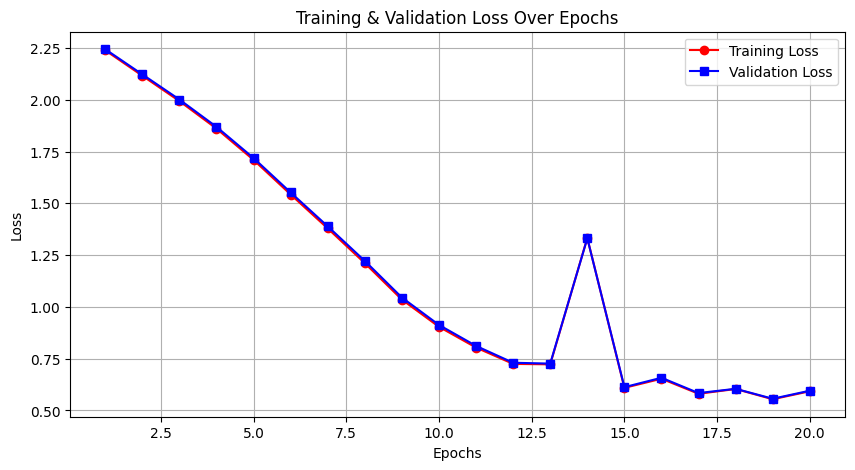

In [ ]:
#
# Visualize Training Loss & Validation Loss
#
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), training_losses, label="Training Loss",color ='r',marker='o')
plt.plot(range(1, 21), validation_losses, label="Validation Loss", color='b',marker='s')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss Over Epochs")
plt.legend()
plt.grid()
plt.show()

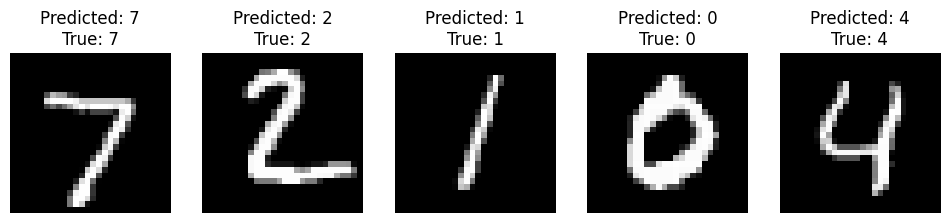

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i, ax in enumerate(axes):
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray')

    # 🛠️ Fix the label display
    true_label = np.argmax(y_test[i])  # Convert one-hot to digit
    ax.set_title(f"Predicted: {y_pred[i]}\nTrue: {true_label}")

    ax.axis("off")

plt.show()

# Define MLP Model 2

---



In [ ]:
#
# Build the MLP Model
#
mlp_model2 = MultilayerPerceptron([
    Dense(784, 2048, Relu()),
    Dense(2048, 1024, Relu()),
    Dense(1024, 512, Relu()),
    Dense(512, 256, Relu()),
    Dense(256, 128, Relu()),
    Dense(128, 10, Softmax())
])

#
# Train the Model
#
training_loss, validation_loss = mlp_model2.train(
    x_train, y_train, x_val, y_val,
    learning_rate=0.001, batch_size=64, epochs=50
)

Epoch 1/50 - Training Loss: 2.1756 - Validation Loss: 2.1766
Epoch 2/50 - Training Loss: 1.9904 - Validation Loss: 1.9915
Epoch 3/50 - Training Loss: 1.7840 - Validation Loss: 1.7837
Epoch 4/50 - Training Loss: 1.5727 - Validation Loss: 1.5712
Epoch 5/50 - Training Loss: 1.4607 - Validation Loss: 1.4555
Epoch 6/50 - Training Loss: 1.7595 - Validation Loss: 1.7392
Epoch 7/50 - Training Loss: 3.0095 - Validation Loss: 2.9539
Epoch 8/50 - Training Loss: 3.0328 - Validation Loss: 2.9800
Epoch 9/50 - Training Loss: 2.8641 - Validation Loss: 2.8144
Epoch 10/50 - Training Loss: 1.6677 - Validation Loss: 1.6289
Epoch 11/50 - Training Loss: 1.5441 - Validation Loss: 1.5361
Epoch 12/50 - Training Loss: 1.0319 - Validation Loss: 1.0114
Epoch 13/50 - Training Loss: 0.8846 - Validation Loss: 0.8702
Epoch 14/50 - Training Loss: 0.8049 - Validation Loss: 0.8002
Epoch 15/50 - Training Loss: 0.7527 - Validation Loss: 0.7549
Epoch 16/50 - Training Loss: 0.6446 - Validation Loss: 0.6403
Epoch 17/50 - Tra

# Evaluate MLP Model 2 on Test Data

---



In [ ]:
#
# Evaluate Model on Test Data
#
print("\n Evaluating Model on Test Data...")
y_pred2 = mlp_model2.predict(x_test)
y_true2 = np.argmax(y_test, axis=1)
accuracy2 = np.mean(y_pred2 == y_true2) * 100

print(f"\n Final Test Accuracy: {accuracy2:.2f}%")



 Evaluating Model on Test Data...

 Final Test Accuracy: 90.30%


# Visualize New Training Loss & Validation Loss

---



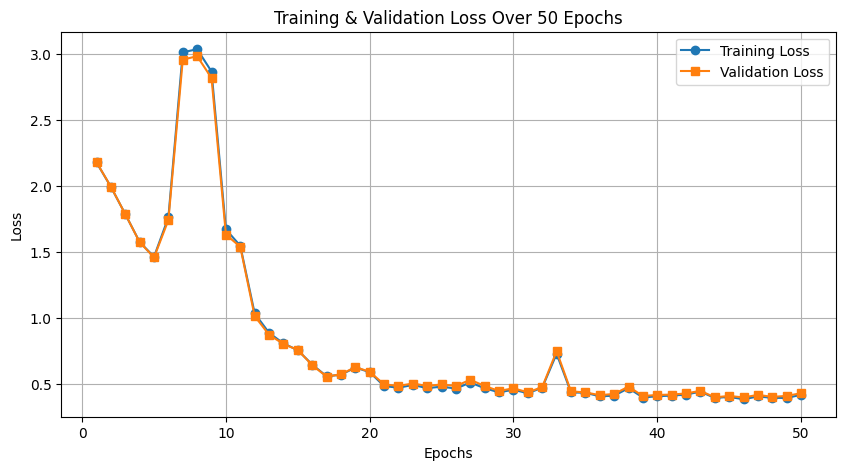

In [ ]:
#
# Visualize Training Loss & Validation Loss
#
plt.figure(figsize=(10, 5))
plt.plot(range(1, 51), training_loss, label="Training Loss", marker='o')
plt.plot(range(1, 51), validation_loss, label="Validation Loss", marker='s')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss Over 50 Epochs")
plt.legend()
plt.grid()
plt.show()

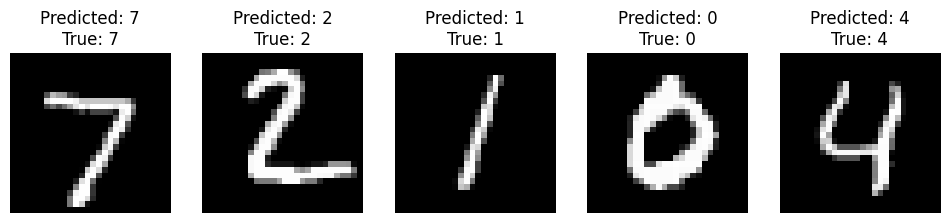

In [ ]:
#
# Visualization
#
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i, ax in enumerate(axes):
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray')

    # 🛠️ Fix the label display
    true_label = np.argmax(y_test[i])  # Convert one-hot to digit
    ax.set_title(f"Predicted: {y_pred2[i]}\nTrue: {true_label}")

    ax.axis("off")

plt.show()

In [ ]:
# Ensure y_true2 is properly defined
y_true2 = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to integer class labels

# Select one sample for each digit class (0-9) from the test dataset
selected_indices = []
selected_images = []
selected_labels = []
selected_predictions = []

# Ensure we pick one sample per class
for i in range(10):
    index = np.where(y_true2 == i)[0][0]  # Find the first occurrence of class i
    selected_indices.append(index)
    selected_images.append(x_test[index].reshape(28, 28))  # Reshape back to 28x28
    selected_labels.append(y_true2[index])  # True label
    selected_predictions.append(y_pred2[index])  # Predicted label

# Plot the selected images with predictions
fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(selected_images[i], cmap='gray')
    ax.set_title(f"Pred: {selected_predictions[i]}\nTrue: {selected_labels[i]}")
    ax.axis("off")

plt.show()
